![Mushrooms in forest](Images/mushroom_forest.jpg)
# Classifying Mushrooms as Edible or Poisonous Using Binary Logistic Regression
## Introduction

In this project, my goal is to use binary logistic regression to predict whether a mushroom is edible or poisonous. The idea is to gain more experience with exploratory data analysis, data cleaning, building binary logistic regression models, and testing model assumptions. 

The data I am using is the [Mushroom dataset](https://archive.ics.uci.edu/dataset/73/mushroom) from the UCI Machine Learning Repository. The dataset has 8,124 observations with 22 features, was created in 1987, and last updated on August 10, 2023. Each row in the dataset represents an observation of one mushroom from one of 23 species of gilled mushrooms in the Agaricus and Lepiota Family, along with corresponding characteristics sush as shape, color, habitat, etc. that can be used to predict its edibility.

## Step 1: Imports
### Import Packages

This project requires the following packages.

In [3483]:
# Standard data processing packages
import pandas as pd
import numpy as np

# Preprocessing, modeling, and evaluation packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import scipy.stats as stats
from scipy.stats import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

# Data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

# Used to fetch data from the UCI repository
from ucimlrepo import fetch_ucirepo 

### Load the Dataset

Load in the data and display the variables. We can see that all the variables are categorical, with two being binary.

In [3484]:
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# variable information 
mushroom.variables

,name,role,type,demographic,description,units,missing_values
0,poisonous,Target,Categorical,None,None,None,no
1,cap-shape,Feature,Categorical,None,"bell=b,conical=c,convex=x,flat=f, knobbed=k,su...",None,no
2,cap-surface,Feature,Categorical,None,"fibrous=f,grooves=g,scaly=y,smooth=s",None,no
3,cap-color,Feature,Binary,None,"brown=n,buff=b,cinnamon=c,gray=g,green=r, pink...",None,no
4,bruises,Feature,Categorical,None,"bruises=t,no=f",None,no
5,odor,Feature,Categorical,None,"almond=a,anise=l,creosote=c,fishy=y,foul=f, mu...",None,no
6,gill-attachment,Feature,Categorical,None,"attached=a,descending=d,free=f,notched=n",None,no
7,gill-spacing,Feature,Categorical,None,"close=c,crowded=w,distant=d",None,no
8,gill-size,Feature,Categorical,None,"broad=b,narrow=n",None,no
9,gill-color,Feature,Categorical,None,"black=k,brown=n,buff=b,chocolate=h,gray=g, gre...",None,no


### View the first 5 rows

Display the first 5 rows of the dataset. As we can see below, `poisonous` is the target variable that we will be predicting and the other columns are potential independent variables we can use for our model.

In [3485]:
# Combine the features and target into a single DataFrame
df_mushroom = pd.concat([X, y], axis=1)

# Display the first 5 rows of the DataFrame
df_mushroom.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


## Step 2: Data Exploration and Cleaning
### Explore the data

Before constructing any models, it is important to explore the data to better understand its shape, whether any data is missing, and what each column means. In the case of this mushroom dataset, each column represents a categorical variable with data taking the form of a single letter. We will need to transform it later into numeric data in order to be used in a binary logistic regression model. First lets explore the data shape and data types. 

In [3486]:
# Print the data types of each column
df_mushroom.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
poisonous                   object
dtype: object

### Check the shape of the dataset

It appears that there are 8124 rows with 23 columns, as expected, with each column being an object data type.

In [3487]:
# Print the shape of the dataset
df_mushroom.shape

(8124, 23)

### Check how many poisonous mushrooms there are

From the code below, we can see that 4208 mushrooms are classified as edible, and 3916 are classified as poisonous. This means our data is well balanced.

In [3488]:
# Count the values of the 'poisonous' column
df_mushroom['poisonous'].value_counts()

poisonous
e    4208
p    3916
Name: count, dtype: int64

### Transform column values

As we saw when we viewed the first 5 rows of the dataset, each column is made up of singlular letters which are hard to understand. For example, a value of "y" in the `cap-surface` column indicates scaly, this would be impossible to figure out at a glance. 

To make the data more easily intepretable, lets transform each column according to the mapping provided by UCI.

In [3517]:
# Define the mapping for all categorical columns
mappings = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 
        'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 
        'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 
        'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', 
        '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 
        'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 
        'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 0, 'o': 1, 't': 2},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 
        'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 
        'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 
        'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 
        'd': 'woods'},
    'poisonous': {'p': 'poisonous', 'e': 'edible'}
}

# Apply the mapping to all relevant columns
df_mushroom.replace(mappings, inplace=True)

# Verify transformation by displaying first 5 rows
df_mushroom.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,white,1,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,white,1,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,white,1,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,white,1,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,white,white,white,1,evanescent,brown,abundant,grasses,edible


This looks much better! Now we can actually understand what each observation means within each column.

In [3490]:
df_mushroom.describe(include=['O'])

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,5,9,6,7,2
top,convex,scaly,brown,no,none,free,close,broad,buff,tapering,...,smooth,white,white,partial,white,pendant,white,several,woods,edible
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,3968,2388,4040,3148,4208


### Visualize the data

Lets plot the distribution of each feature.

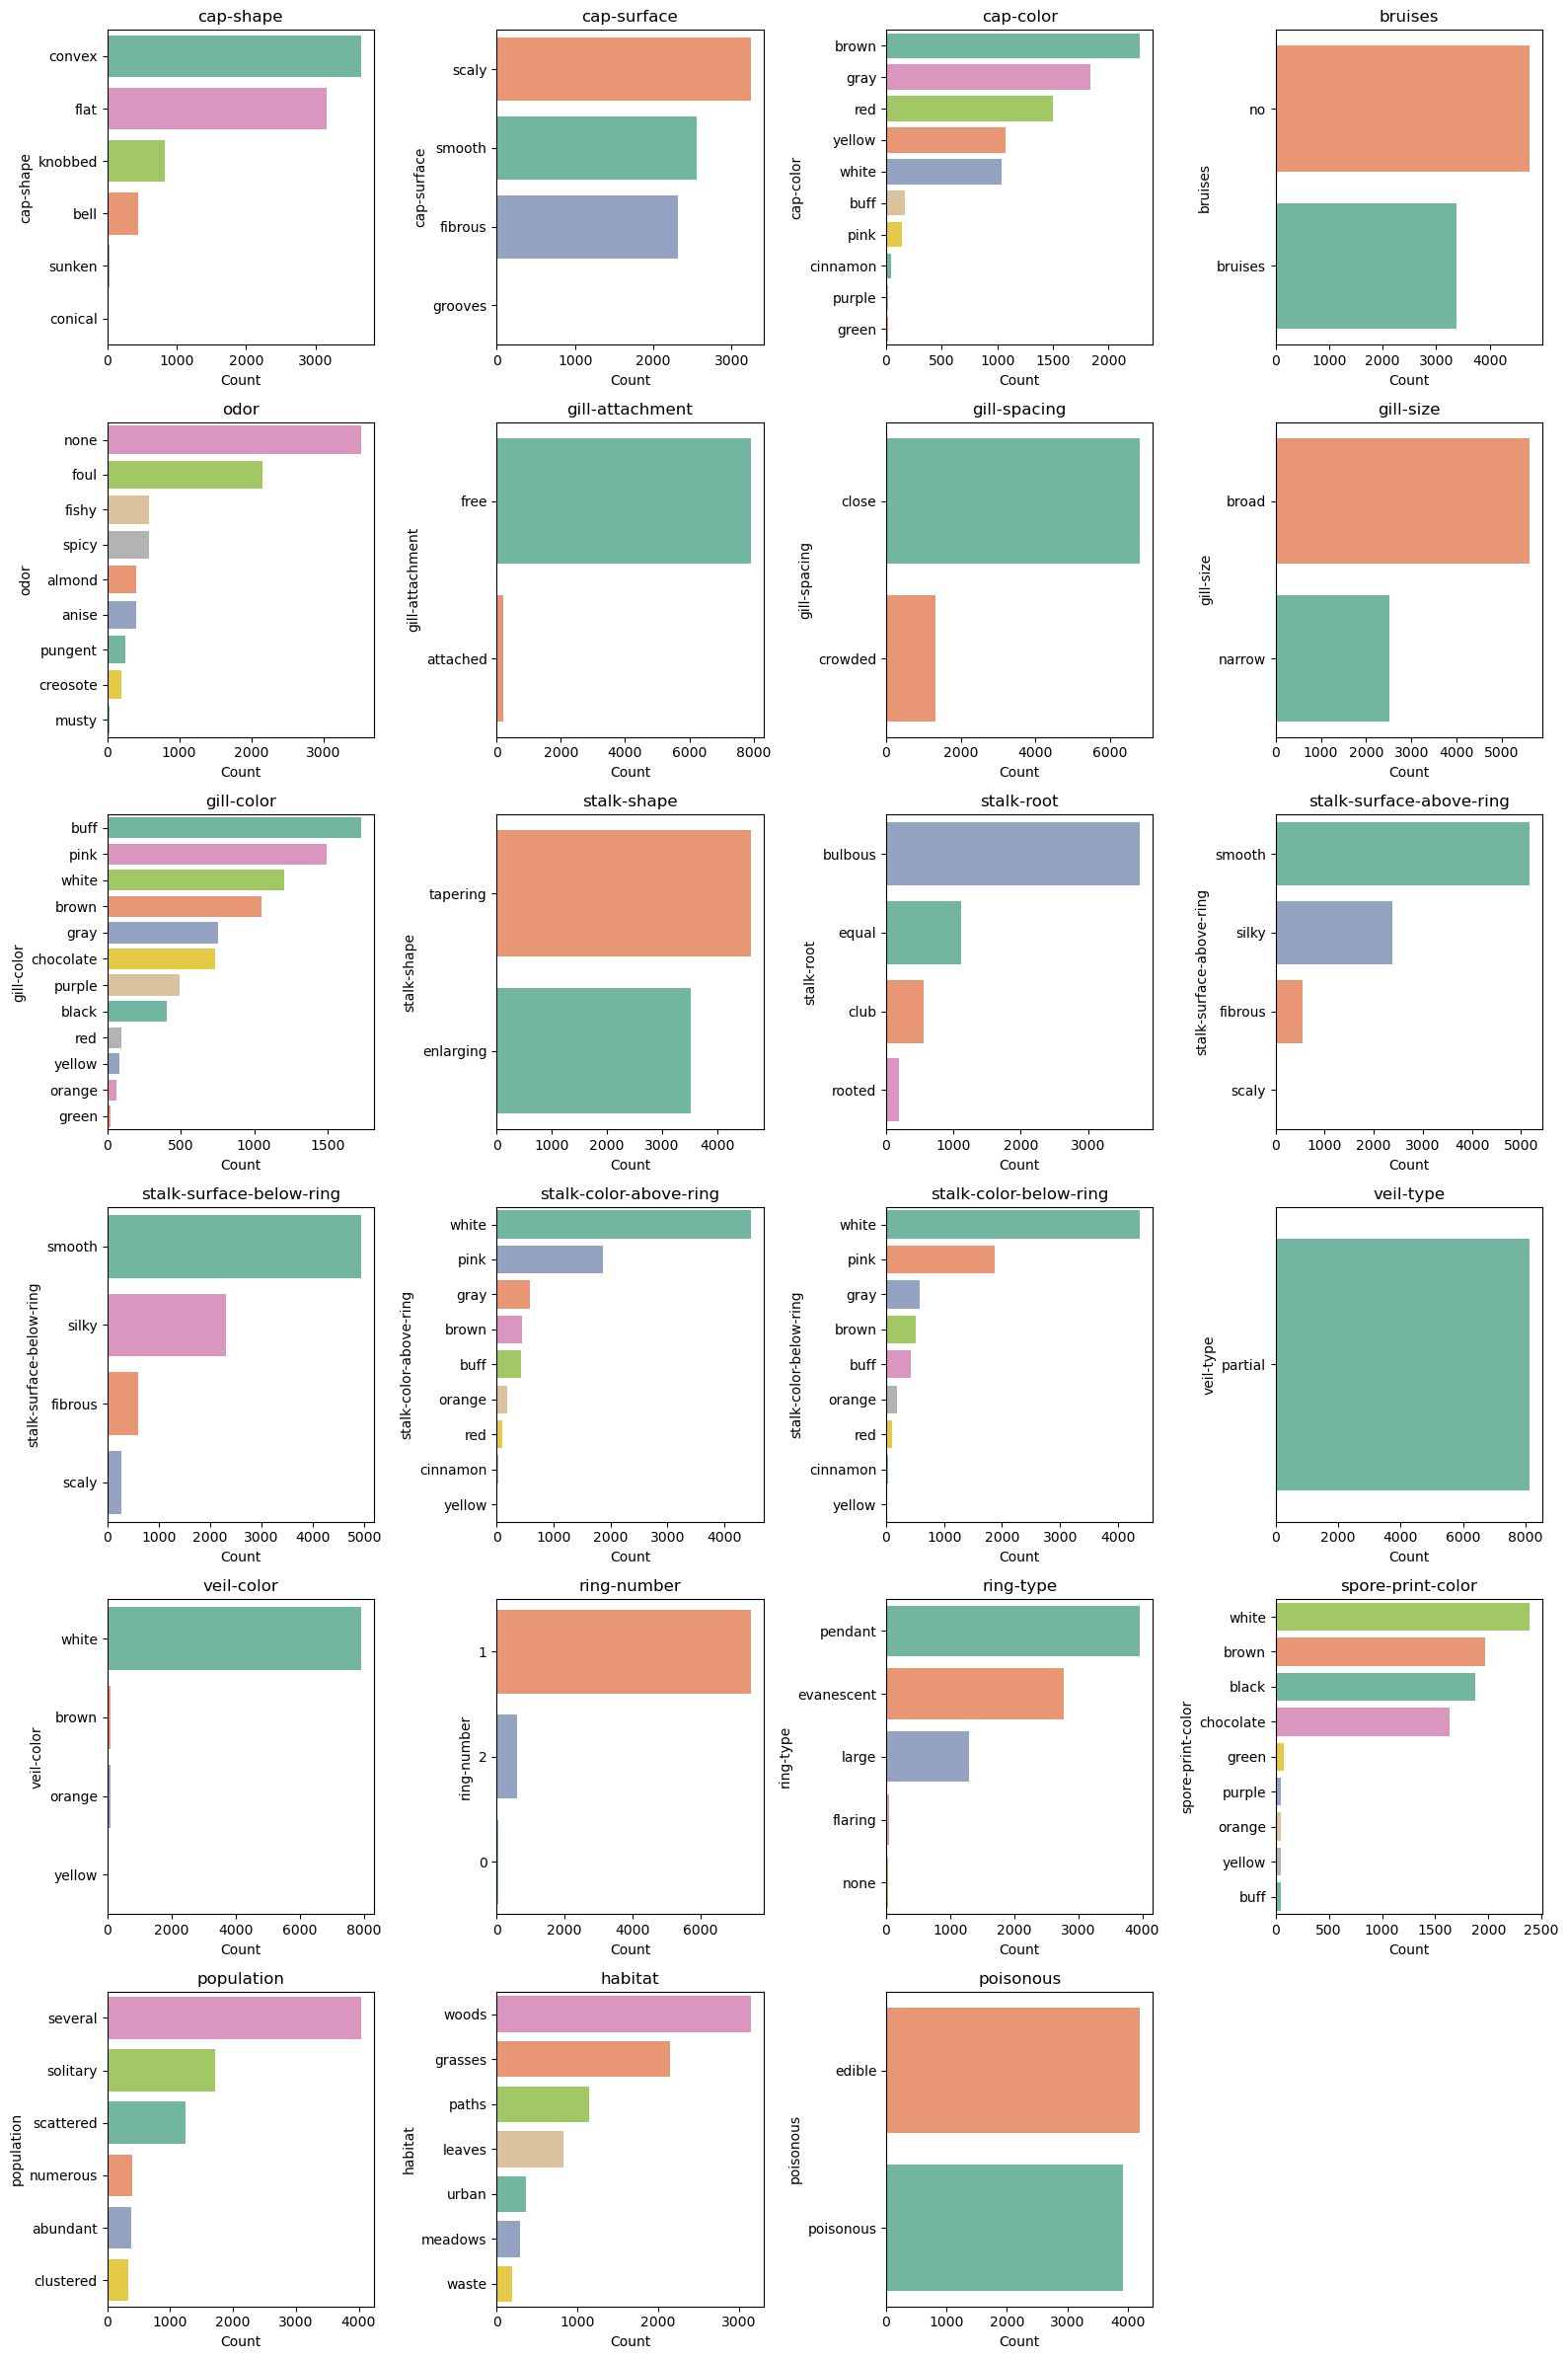

In [3491]:
# Set up the FacetGrid
num_cols = 4
num_rows = -(-len(df_mushroom.columns) // num_cols) 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through columns and create a count plot for each
for i, col in enumerate(df_mushroom.columns):
    palette = sns.color_palette("Set2", n_colors=df_mushroom[col].nunique())
    sns.countplot(y=df_mushroom[col], ax=axes[i], order=df_mushroom[col].value_counts().index, hue=df_mushroom[col],
                  palette=palette, legend=False)
    axes[i].set_title(col)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We can see that `veil-type` has only one value, which makes it useless in predicting whether a mushroom is poisonous or not. We can remove it later.

### Check for Null values in the data

It looks like every column has 0 missing values, except for `stalk-root` which has 2,480 missing values. This means approximately 25% of rows are missing data for this column. Because I have no way of gathering the missing data, I could remove the column since there are 21 other columns to use for building the model. However, if there is a strong relationship between `stalk-root` and whether the mushroom is poisonous then this might not make sense since we would lose valuable predictive information.

In [3492]:
# Count the number of missing values in each column
df_mushroom.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

### Chi-Square Test of Independence

To determine whether I should remove the column, I will use a Chi-Square Test of Independence to see if there is a significant association between `stalk-root` and `poisonous`. The Chi-Square Test of Independence calculations are based on the actual and expected number of observations in each combined group. We will evaluate a null and alternative hypothesis as follows:
- **Null Hypothesis (H₀):**  There is no association between the `stalk-root` and whether the mushroom is poisonous or edible. In other words, the distribution of `stalk-root` is independent of the `poisonous` variable.

- **Alternative Hypothesis (H₁):**  There is a significant association between the `stalk-root` and whether the mushroom is poisonous or edible. This means that the `stalk-root` variable may be useful in predicting whether a mushroom is poisonous.

We will use the `crosstab` function within the `scipy.stats` package to create a contingency table, which shows the number of observations in each combination of groups.

In [3493]:
# Drop rows with missing values for the column of interest
df_clean = df_mushroom.dropna(subset=['stalk-root'])

# Create a contingency table
contingency_table = pd.crosstab(df_clean['stalk-root'], df_clean['poisonous'])
print(contingency_table)

poisonous   edible  poisonous
stalk-root                   
bulbous       1920       1856
club           512         44
equal          864        256
rooted         192          0


In [3494]:
# Perform the Chi-Square test
chi_sq, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi_sq}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:\n", expected)

# Interpretation
if p < 0.05:
    print("The variable is significantly related to the target variable.")
else:
    print("No strong evidence of a relationship between the variable and the target variable.")

Chi-Square Statistic: 638.2637626946303
P-value: 5.103920794627432e-138
Degrees of Freedom: 3
Expected Frequencies Table:
 [[2333.57335223 1442.42664777]
 [ 343.60878809  212.39121191]
 [ 692.16158753  427.83841247]
 [ 118.65627215   73.34372785]]
The variable is significantly related to the target variable.


In the code above, the chi-square statistic (`chi2`) is calculated by taking the summation across all groups of the observed frequency minus the expected frequency, squared, divided by the expected frequency. The follwoing formula is used.

χ² = Σ [(O_i - E_i)² / E_i]

Where:
- `O_i` = Observed frequency (actual count from data)
- `E_i` = Expected frequency (calculated under the assumption of independence)
- The sum (Σ) is taken over all categories in the contingency table.

In the output above, we can see the chi-square test statistic is `638.26`. We can compare this to a critical value to determine whether it is large enough to reject the null hypothesis that the two variables are unrelated. To calculate the critical chi-square value, we use the following code.

In [3495]:
# Calculate the critical value for significance level 0.05
a = 0.05
critical_value = chi2.ppf(1 - a, dof)
print(f"Chi-Squared Critical Value: {critical_value}")

Chi-Squared Critical Value: 7.814727903251179


Since our chi-square statistic is significantly larger than 7.81, we reject the null hypothesis, meaning there is a statistically significant association between `stalk-root` and `poisonous`. Additionally, the p-value is extremely small (5.1*10^-138) which suggests there is a highly significant relationship between the two variables, thus providing further evidence to reject the null hypothesis.

### Feature selection

On the one hand, it might not make sense to drop this column because it has a significant relationship with whether the mushroom is poisonous or not, and removing rows where `stalk-root` is missing would delete 25% of the data. On the other hand, leaving in the rows with missing values will throw off the One Hot Encoding process because it will interpret NULL as a unique category a create a dummy variable for it.

Before dropping any data, lets look at what other features are important or irrelevant for our analysis.

In [3496]:
# Get the number of unique values per column
unique_values = df_mushroom.nunique().sort_values()
unique_values

veil-type                    1
poisonous                    2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
cap-surface                  4
stalk-root                   4
ring-type                    5
population                   6
cap-shape                    6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

It seems that many of our variables have a high number of unique values, as seen above. For example, `gill-color` has 12 unique values which means that 11 columns will be created to cover each color using One Hot Encoding. Thus, if we use One Hot Encoding to transform our variables into binary columns, it will significantly increase the number of features which could make interpretation difficult and lead to overfitting. To help reduce complexity, lets perform the chi square test of independence on each categorical variable to see if we can drop any irrelevant variables from our analysis.

In [3497]:
# Get the column names of categorical columns, removing the target column and single numeric column
categorical_cols = df_mushroom.drop(columns=['poisonous','ring-number']).columns

# Dictionary to store p-values
chi2_results = {}

# Perform chi-square test for each categorical column
for col in categorical_cols:
    contingency_table = pd.crosstab(df_mushroom[col], df_mushroom['poisonous'])  # Create contingency table
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Perform chi-square test
    chi2_results[col] = p  # Store p-value

# Convert results to a DataFrame and sort by significance
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['p_value']).sort_values(by='p_value')

# Display results
print(chi2_df)


                                p_value
habitat                    0.000000e+00
spore-print-color          0.000000e+00
ring-type                  0.000000e+00
bruises                    0.000000e+00
odor                       0.000000e+00
stalk-color-below-ring     0.000000e+00
gill-size                  0.000000e+00
gill-color                 0.000000e+00
stalk-color-above-ring     0.000000e+00
population                 0.000000e+00
stalk-surface-above-ring   0.000000e+00
stalk-surface-below-ring   0.000000e+00
gill-spacing              5.022978e-216
stalk-root                5.103921e-138
cap-shape                 1.196457e-103
cap-color                  6.055815e-78
cap-surface                5.518427e-68
veil-color                 3.320973e-41
gill-attachment            5.501707e-31
stalk-shape                4.604746e-20
veil-type                  1.000000e+00


As seen above, `veil-type` is the only variable that does not have a significant association with `poisonous`. This makes sense because as we saw earlier, `veil-type` only has one unique value and therefore will not be useful in predicting whether a mushroom is poisonous or edible. The rest of the variables are highly significant, as indicated by their extremely small p-values. Lets drop `veil-type` from our data to reduce complexity.

In [3498]:
# Drop veil-type column
df_mushroom = df_mushroom.drop(columns=['veil-type'])

# Check if 'veil-type' column is in the DataFrame
'veil-type' in df_mushroom.columns

False

The `veil-type` column was successfully dropped as confirmed by the code output above. Lets also create two new dataframes as follows:
1. `df_dropped_rows`: Drops all rows where stalk-root is missing.
2. `df_dropped_column`: Drops the stalk-root column entirely.

In [3499]:
# Drop rows where 'stalk-root' is NaN
df_dropped_rows = df_mushroom.dropna(subset=['stalk-root'])

# Reset index after dropping rows
df_dropped_rows = df_dropped_rows.reset_index(drop=True)

# Drop the 'stalk-root' column entirely
df_mushroom_clean = df_mushroom.drop(columns=['stalk-root'])

For now we will conduct our analysis and build our models using `df_mushroom` in which we dropped the `stalk-root` column, but we will return to `df_dropped_rows` later to see if it is able to better predict mushroom edibility with the extra column, despite losing some data.

### Transform data using One Hot Encoding

Given that all of our categorical columns contain nominal features, **One Hot Encoding** is the best choice for transforming our variables into numeric type. Label Encoding does not make sense because none of our variables are ordinal, and hence coding them as unique numbers in the same column might introduce a misleading ordinal relationship that would only be approproate if the data had some inherent order. One Hot Encoding converts categorical variables into binary format by introducing new dummy variable columns for each unique category of that variable. 

In [3500]:
# Define the columns that need One-Hot Encoding (every column except ring-number)
categorical_columns = df_mushroom_clean.drop(columns=['ring-number']).columns.tolist()

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(df_mushroom_clean[categorical_columns])

# Get the new column names from the encoder
encoded_col_names = encoder.get_feature_names_out(categorical_columns)
print("Number of columns after OHE: " + str(len(encoded_col_names)))

# Convert the encoded array to a DataFrame
df_encoded = pd.DataFrame(encoded_array, columns=encoded_col_names, index=df_mushroom_clean.index)

# Drop the original categorical columns and concatenate the new encoded columns
df_mushroom_clean = df_mushroom_clean.drop(columns=categorical_columns).join(df_encoded)

# Rename the poisonous column from 'poisonous_poisonous' to 'poisonous'
df_mushroom_clean = df_mushroom_clean.rename(columns={'poisonous_poisonous': 'poisonous'})

# Display the first few rows
df_mushroom_clean.head()


Number of columns after OHE: 90


,ring-number,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,poisonous
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I printed the number of columns created by One Hot Encoding so we can check that it worked correctly. According to the table below, we would expect to get 90 columns by using One Hot Encoding. This lines up with what our code printed, showing that our encoder indeed created 84 columns. By viewing the dataframe, we can see that it has 91 columns, whioch makes sense because we appended our 90 dummy variable columns to the other 1 remaining column (`ring-number`).

| Categorical Column (w/ 3+ categories)                    | # of Unique Categories | New Columns |
|----------------------------|-------------------|------------------------|
| `poisonous `                | 2                 | 1                      |
| `bruises`                   | 2                 | 1                      |
| `gill-attachment`           | 2                 | 1                      |
| `gill-spacing`              | 2                 | 1                      |
| `gill-size`                 | 2                 | 1                      |
| `stalk-shape`               | 2                 | 1                      |
| `veil-color`                | 4                 | 3                      |
| `stalk-surface-below-ring`  | 4                 | 3                      |
| `stalk-surface-above-ring`  | 4                 | 3                      |
| `cap-surface`               | 4                 | 3                      |
| `ring-type`                 | 5                 | 4                      |
| `population`                | 6                 | 5                      |
| `cap-shape`                 | 6                 | 5                      |
| `habitat`                   | 7                 | 6                      |
| `stalk-color-above-ring`    | 9                 | 8                      |
| `stalk-color-below-ring`    | 9                 | 8                      |
| `odor`                      | 9                 | 8                      |
| `spore-print-color`         | 9                 | 8                      |
| `cap-color`                 | 10                | 9                      |
| `gill-color`                | 12                | 11                     |
| **Total**                   |                   | **90**                 |

Lets check the data types again to ensure all the columns are numeric type.

In [3501]:
# Check if all columns are of type float
all_float = df_mushroom_clean.dtypes.eq('float64').all()
print(f"All columns are of float type: {all_float}")

All columns are of float type: False


In [3502]:
# Identify which column(s) are not of type float
non_float_columns = df_mushroom_clean.columns[df_mushroom_clean.dtypes != 'float64']
print("Columns not of float type:")
print(non_float_columns)

Columns not of float type:
Index(['ring-number'], dtype='object')


It seems like `ring-number` is still an object type, lets convert it to float using the following code.

In [3503]:
# Convert 'ring-number' to float type
df_mushroom_clean['ring-number'] = df_mushroom_clean['ring-number'].astype(float)

# Check the data type again to verify
print("Data type of ring-number column: " + str(df_mushroom_clean['ring-number'].dtype))

# Check if all columns are of type float
all_float = df_mushroom_clean.dtypes.eq('float64').all()
print(f"All columns are of float type: {all_float}")

Data type of ring-number column: float64
All columns are of float type: True


Now that we have a solid understanding of our data and it's cleaned and in the right format, we can move onto testing assumptions for our binary logistic regression model.

## Step 3: Check Model Assumptions

The assumptions for binary logistic regression are as follows:
1. Independent Observations: P(A AND B) = P(A) * P(B)
2. Linearity: there should be a linear relationship between each X variable and the logit (log odds) of the probability that Y equals 1
3. Little to no multicollinearity between X predictors
4. No extreme outliers

For the first assumption, we can assume that observations are independent because the observed characteristics for one mushroom are not influenced by or related to the characteristics of another mushroom.

We can also assume the second assumption is met because you only need to check the linearity assumption for continuous predictors. For categorical predictors, the linearity assumption is always met for each of the indicator functions since a straight line always fits two points exactly.

For the fourth assumption, categorical variables cannot have outliers by definition, so we can assume this is met.

For the third assumption, we can use the Chi-Square Test of Independence to check for multicollinearity between categorical variables. The test determines whether two categorical variables are associated, and if the association is strong (indicated by a very small p-value), it might suggest multicollinearity.

In [3504]:
# We will use a previous version of the dataframe before we implemented One-Hot Encoding
df_chi_test = df_mushroom.drop(columns=['stalk-root'])

# Get all categorical features
categorical_columns = df_chi_test.drop(columns=['ring-number','poisonous']).columns.tolist()

chi2_results = {}

# Loop over unique pairs of variables
for col1, col2 in combinations(categorical_columns, 2):  # Only unique pairs
    contingency_table = pd.crosstab(df_chi_test[col1], df_chi_test[col2])
    chi2_stat, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi2_results[(col1, col2)] = p  # Store p-value

# Convert to DataFrame for easier visualization
chi2_df = pd.DataFrame(chi2_results.items(), columns=['Variable Pair', 'P-Value'])
chi2_df = chi2_df.sort_values(by='P-Value')  # Sort by significance

# Sort by p-value
chi2_df = chi2_df.sort_values(by='P-Value')

# Display highly correlated pairs (p-value < 0.05)
chi2_df[chi2_df['P-Value'] < 0.05]


,Variable Pair,P-Value
170,"(population, habitat)",0.000000e+00
166,"(ring-type, population)",0.000000e+00
7,"(cap-shape, gill-color)",0.000000e+00
165,"(ring-type, spore-print-color)",0.000000e+00
164,"(veil-color, habitat)",0.000000e+00
...,...,...
84,"(gill-attachment, stalk-surface-above-ring)",1.134492e-15
95,"(gill-spacing, stalk-shape)",3.843922e-13
25,"(cap-surface, stalk-shape)",6.542808e-11
5,"(cap-shape, gill-spacing)",1.879772e-10


It seems like many of our categorical variables have strong associations with each other. This could be due to biological reasons that cause these characteristics to be related to each other. For example, features that describe physical traits may reflect an underlying species or environment, making them highly correlated. For now we will not drop any variables to see how our model performs.

## Step 4: Model Creation & Evaluation

### Split the data

First we need to split the data into training and test subsets. Lets use a 70/30 split, where we use 70% of the data for training and hold out 30% for testing.

In [3505]:
# Define features and target variable
X = df_mushroom_clean.drop(columns=['poisonous'])  # Features
y = df_mushroom_clean['poisonous']  # Target variable

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19, stratify=y)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (5686, 90), y_train shape: (5686,)
X_test shape: (2438, 90), y_test shape: (2438,)


### Fit a Logistic Regression model to the data

Now lets build a logistic regression model and fit the model to the training data.

In [3506]:
# Build logistic regression model
model = LogisticRegression(random_state=19).fit(X_train, y_train)

# Display the model's coefficients
print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model coefficients: [[ 5.43762663e-01  5.87167983e-01 -2.03694330e-01 -7.71428218e-02
   7.04992563e-02 -7.13067700e-01  1.10277561e+00  2.42532722e-01
   5.51022766e-01  1.29623401e+00 -6.61439865e-01  2.99137405e-01
  -4.82475370e-01  1.30140681e+00 -6.02555394e-01  2.14730609e-01
   5.11471344e-01 -5.58683635e-01 -3.52735202e-01 -1.83140720e+00
   4.08502999e+00  9.25729604e-01  4.01285102e+00  4.14842413e-01
  -3.13808295e+00  3.40535701e+00  9.10587717e-01 -2.26463581e-01
  -1.88693653e+00  3.63591519e+00 -5.28781625e-01  1.98079854e+00
   2.16554515e-01  8.10107447e-02  7.06419077e-01 -1.91206414e-01
  -2.64238634e-01 -3.14132810e-02 -6.59166666e-01 -1.07381080e-02
   2.96662898e-02 -4.89986365e-01  1.79757468e-01  1.78953755e+00
  -1.05805996e+00  6.95925586e-01  5.33876481e-01 -1.67949718e-02
   2.86606085e-01  4.14842413e-01 -3.95650572e-01 -6.25362650e-01
   1.96977252e-01 -7.64990190e-01 -2.96316115e-01  4.53391923e-01
   2.97389862e-01  4.14842413e-01 -3.53736767e-01 -6.253

### Make predictions

Now that the model is trained, lets use it to make predictions on the test set (`X_test`).

In [3507]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### Evaluate the Model: Accuracy, Precision, Recall, F1 Score

Calculate performance metrics using functions from `sklearn.metrics`.

In [3508]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

# Calculate precision
precision = metrics.precision_score(y_test, y_pred)

# Calculate recall
recall = metrics.recall_score(y_test, y_pred)

# Calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9984
Precision: 1.0000
Recall: 0.9966
F1 Score: 0.9983


The performance metrics shown above suggest that our model performs very well in predicting whether mushrooms are poisonous or not. Below is an interpretation of each metric:
1. **Accuracy**: A value of 0.9984 indicates that our model correctly categorized 99.84% of mushrooms as either poisonous or edible. This is a very high value, which suggests the model is quite accurate. 
    * Accuracy is calculated by dividing the sum of true positives and true negatives by the number of total predictions (which represents the proportion of predictions that were correctly categorized). [ (True Positives + True Negatives) / Total Predictions ]
2. **Precision**: A precision value of 1.00 means that out of all the mushrooms the model predicted as poisonous, 100% of them were actually poisonous. The model did not make any false positives, which is a great result. 
    * Precision is calculated by dividing the number of true positives by the sum of true positives and false positives (representing the proportion of positive predictions that were true positives). [ True Positives / (True Positives + False Positives) ]
3. **Recall**: A recall of 0.9966 indicates that 99.66% of the actual poisonous mushrooms were correctly identified as poisonous by the model. A small fraction (~0.34%) of poisonous mushrooms were missed by the model and incorrectly categorized as edible. While this number is very small, this could pose danger in a situation like this where eating a poisonous mushroom that you thought was edible could have dire consequences. 
    * Recall is calculated by dividing the number of true positives by the sum of true positives and false negatives (representing the proportion of positives the model was able to identify correctly). [ True Positives / (True Positives + False Negatives) ]
4. **F1 Score**: A high F1 Score of 0.9983 indicates that the model is performing great in terms of both precision and recall, effectively balancing the trade-off between correctly identifying positive instances and minimizing false positives.

In summary, I would say this model is very effective at predicting mushrooms as poisonous or edible. However, if I were to use this in real world situations I would try to improve the **recall** to become 100% so that no poisonous mushrooms are incorrectly classified as edible. This may require us to have a lower precision, but that would be fine since false positives are less dangerous that false negatives in this situation.

### Confusion Matrix

Lets use a **confusion matrix** to see the number of true/false positives/negatives predicted by our model.

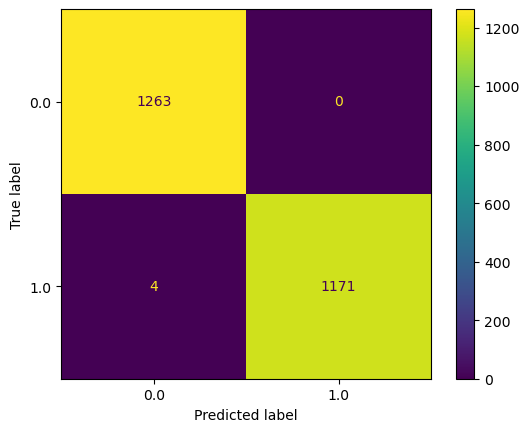

In [3509]:
# Create and display the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In the matrix above, the top left quadrant represents true positives, top right is false positives, bottom left is false negatives, and bottom right is true negatives. As we can see, our model is great at predicting whether a mushroom is poisonous or edible. It has a slightly higher precision than recall because while it did not capture all poisonous mushrooms, all the mushrooms it did classify as poisonous were indeed poisonous.

But before making any conclusions, we must consider that this great performance could be due to overfitting. Overfitting would mean our model captured both the **signal** (the relationship between the predictors and the outcome variable) and the **noise** (the randomness in the dataset that is not part of the relationship). 

### Perform Cross Validation

Lets use **cross validation** to ensure our model is evaluated on different subsets of the data to get a better estimate of performance. By evaluating the model on multiple validation subsets, cross validation provides a more realistic estimate of the model's ability to generalize and perform well on unseen data.

In the code below, `cv=10` means that we want to split our data into 10 subsets/folds for cross validation.

In [3510]:
# Calculate cross validation scores
scores = cross_val_score(model, X, y, cv=10)
print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

Cross-validation scores: [0.79335793 1.         0.99876999 1.         0.99384236 0.99876847
 1.         1.         0.76724138 1.        ]
Mean cross-validation score: 0.955198013802798


The mean accuracy of 0.9552 indicates that, on average, the model correctly classified 95.5% of the data points during the cross-validation process. This is quite solid for our purposes, but lets look at another model.

## Step 5: Compare Alternative Model

As you may remember, we saved another dataframe (`df_dropped_rows`) where we kept the `stalk-root` column but dropped all the rows with missing values in this column. Lets create a model using this data and compare it to our above model to see how it performs. First we need to encode the categorical columns using One Hot Encoding, then we split the dataset into training and test subsets, and lastly we will build and evaluate the model.

In [3511]:
df_dropped_rows['poisonous'].value_counts()


poisonous
edible       3488
poisonous    2156
Name: count, dtype: int64

In this dataset our target is slightly imbalanced (3488 edible vs. 2156 poisonous mushrooms), which could impact performanmce metrics like precision, recall, and F1 score. Lets keep this in mind for when we create our model.

### One Hot Encoding

Implement one hot encoding on the alternate dataframe.

In [ ]:

# Select categorical columns
categorical_columns = df_dropped_rows.select_dtypes(include=['object']).columns

# Initialize the encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform the data
encoded_array = encoder.fit_transform(df_dropped_rows[categorical_columns])

# Convert to DataFrame
encoded_df_dropped = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns), 
                                  index=df_dropped_rows.index)

# Concatenate with the rest of the dataset (excluding original categorical columns)
df_dropped_encoded = pd.concat([df_dropped_rows.drop(columns=categorical_columns), encoded_df_dropped], axis=1)

# Rename the poisonous column from 'poisonous_poisonous' to 'poisonous'
df_dropped_encoded = df_dropped_encoded.rename(columns={'poisonous_poisonous': 'poisonous'})

df_dropped_encoded.head()


,ring-number,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_woods,poisonous
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It seems like there are fewer columns in our new encoded dataframe when compared to `df_mushroom_clean`. This is because some of the variables which had categories with a low number of observations were associated with rows where `stalk-root` was missing, and were therefore dropped from the data. This leads to some of the categories within certain variables disappearing altogether.

### Split the data

Now lets split the data into training and test subsets.

In [3513]:

# Define features and target variable
X_d = df_dropped_encoded.drop(columns=['poisonous']) # Features
y_d = df_dropped_encoded['poisonous'] # Target variable

# Split the dataset into 70% training and 30% testing
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.3, random_state=19)

# Check the distribution after splitting
print(f"Training set size: {X_train_d.shape[0]} samples")
print(f"Test set size: {X_test_d.shape[0]} samples")

print("\nTraining set target variable distribution:")
print(y_train_d.value_counts())
print("\nTesting set target variable distribution:")
print(y_test_d.value_counts())


Training set size: 3950 samples
Test set size: 1694 samples

Training set target variable distribution:
poisonous
0.0    2455
1.0    1495
Name: count, dtype: int64

Testing set target variable distribution:
poisonous
0.0    1033
1.0     661
Name: count, dtype: int64


It looks like our training and test data maintained the same level of imbalance for the target variable (approximately 60%).

### Build and evaluate new Logistic Regression model

Now we will create a new Logistic Regression model using this data and evaluate it.

In [3514]:
# Build new logistic regression model
model_2 = LogisticRegression(class_weight='balanced', random_state=19).fit(X_train_d, y_train_d)

# Display the model's coefficients
print("Model coefficients:", model_2.coef_)
print("Intercept:", model_2.intercept_)

# Make predictions on the test set
y_pred_d = model_2.predict(X_test_d)

# Calculate accuracy
accuracy_d = metrics.accuracy_score(y_test_d, y_pred_d)

# Calculate precision
precision_d = metrics.precision_score(y_test_d, y_pred_d)

# Calculate recall
recall_d = metrics.recall_score(y_test_d, y_pred_d)

# Calculate F1 score
f1_d = metrics.f1_score(y_test_d, y_pred_d)

# Print the results
print(f"Accuracy: {accuracy_d:.4f}")
print(f"Precision: {precision_d:.4f}")
print(f"Recall: {recall_d:.4f}")
print(f"F1 Score: {f1_d:.4f}")

Model coefficients: [[ 1.15199579  0.61700436 -0.12285987  0.09347712  0.08874432 -0.69717226
   0.65517443  0.59648191  0.93447563  1.19361751 -0.51016472  0.28812612
   1.23634684 -0.12255744  0.61800041 -0.72358839 -0.24780742 -1.53232816
   3.18728377  3.03394001  0.73577948 -2.54632225  3.21888671 -0.54417935
  -0.76523363  1.89705555 -0.56550358  0.4087402   0.16412728  0.74832488
  -0.07788437  0.15419809 -0.15979248  0.70986297 -2.43814289 -2.69302094
  -0.23530405 -1.40633684  0.34814885  1.46247631 -0.89498981 -0.32240851
   0.72669683 -0.1391953   0.21397203  0.73577948 -0.52455014 -0.41190855
  -0.84889309  0.75119936  0.20270122  0.73577948 -0.33964896 -0.17777075
   0.52294673  0.75119936  0.75119936  0.72669683  0.73577948  0.25679458
  -0.65189572  3.03394001  3.34575915 -1.08287921 -0.16819503  2.83666734
  -1.12336426 -0.09143632 -0.03156849 -1.38205508  0.30936227 -0.06494536
  -1.13617707  0.06507134  0.08910691]]
Intercept: [-0.43777309]
Accuracy: 1.0000
Precision:

It looks like this model performs even better than the previous on all evaluation metrics, but this could once again indicate overfitting. Lets look at the confusion matrix to get more detail.

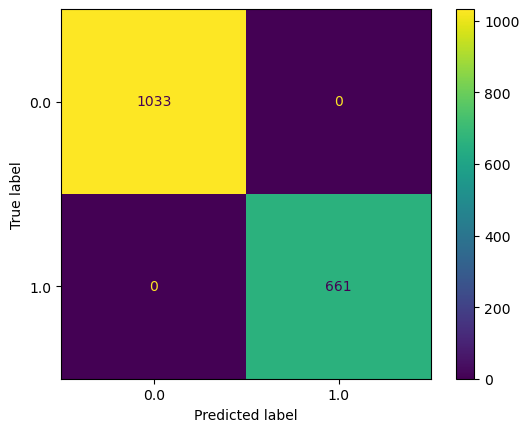

In [3515]:
# Create and display the confusion matrix
cm = metrics.confusion_matrix(y_test_d, y_pred_d, labels=model_2.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_2.classes_)
disp.plot()

It seems like this model is perfectly accurate, predicting all mushrooms correctly as poisonous or edible and making no false poisitives or false negatives. This could be a result of overfitting, which we can test below using cross validation like we did previously.

Another case could be that there is a very clear distinction between edible and poisonous mushrooms based on features, and the model simply learned these distinctions perfectly.

### Cross Validation

Implement cross validation for alternate model.

In [3516]:
# Calculate cross validation scores
scores = cross_val_score(model_2, X_d, y_d, cv=10)
print(f'Cross-validation scores (alternate model): {scores}')
print(f'Mean cross-validation score (alternate model): {scores.mean()}')

Cross-validation scores (alternate model): [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.80141844]
Mean cross-validation score (alternate model): 0.9801418439716312


The mean accuracy of 0.988 indicates that, on average, the model correctly classified 98.8% of the data points during the cross-validation process. This is higher than the mean accuracy of the previous model after cross validation, which was 95.5%, and indicates that this model is better at generalizing to unseen data.

## Conclusion

In this analysis, I built and compared two binary logistic regression models for predicting whether a mushroom is poisonous or edible based on its various characteristics. The main difference between the models was how they handled the missing values in the `stalk-root` column, which was determined to have a significant association with edibility.
* **Model 1**: This model was trained on a dataset where the `stalk-root` column was removed entirely. While this model performed well with a **mean accuracy of 95.5%** during cross-validation, it ignored a potentially important feature by dropping the column entirely.
* **Model 2**: This model, on the other hand, was trained on a dataset where rows with missing values in the `stalk-root` column were dropped, so that the column itself could be kept for analysis. This model had a significantly better **mean accuracy of 98.8%** during cross-validation, despite removing approximately 25% of observations. This suggests that keeping the `stalk-root` column leads to better predictive performance, even though we had less data overall.

The significant performance improvement of Model 2 over Model 1 indicates that `stalk-root` is an important feature in predciting whether a mushroom is poisonous or edible. By retaining this feature and removing rows with missing data, the model was able to leverage the predictive information provided by this additional feature. In contrast, the removal of `stalk-root` in Model 1 resulted in a notable reduction in predictive accuracy because it lost a variable that was significantly associated with edibility.

In conclusion, Model 2 demonstrates better generalization and predictive accuracy, which highlights the importance of selecting the right features, properly handling missing data, and always being hesitant to drop features that may have predictive power. Some possible next steps could be identifying ways to fill in the missing data in the `stalk-root` column, and building more complex machine learning models to see if they are more accurate.

Thank you for viewing my project!


![toad wave](Images/toadwave.gif)